### 타입을 확인하는 함수

In [55]:
# 넘파이로 간단한 함수 구현하기
import numpy as np
from numpy import ndarray

def square(x: ndarray) -> ndarray :
  '''
  인자로 받은 ndarray 배열의 각 요솟값을 제곱한다.
  '''
  return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray :
  '''
  ndarray 각 배열의 요소에 'Leaky ReLu함수를 적용한다.'
  '''
  return np.maximum(0.2*x, x)

### 도함수

In [56]:
# func: Callable[[ndarray], ndarray]
#       인자로 ndarray를 입력으로 받고, ndarray타입값을 반환하는 함수
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          delta: float = 0.001) -> ndarray :
    '''
    배열 input이 각 요소에 대해 함수 func의 도함수값 계산
    '''
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

### 합성함수

In [57]:
# 데이터 타입 정의
from typing import List

# ndarray를 인자로 받고 ndarray를 반환하는 함수
Array_Function = Callable[[ndarray], ndarray]

# Chain은 함수의 리스트다.
Chain = List[Array_Function]

In [58]:
Chain

typing.List[typing.Callable[[numpy.ndarray], numpy.ndarray]]

In [59]:
# 합성함수로 처리
def chain_length_2(chain: Chain, a: ndarray) -> ndarray :
  '''
  두 함수를 연쇄(chain)적으로 평가
  '''
  # 인자 chain의 길이는 2여야 함(2개의 함수 연결)
  assert len(chain) == 2

  f1 = chain[0]
  f2 = chain[1]

  return f2(f1(a))

### 합성함수의 도함수

In [60]:
def sigmoid(x: ndarray) -> ndarray :
  '''
  입력으로 받은 ndarray의 각 요소에 대한 sigmoid 함수값을 계산한다.
  '''
  return 1 / (1 + np.exp(-x))

In [61]:
# 연쇄법칙 구현
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray :
    '''
    두 함수로 구성된 합성함수의 도함수를 계산하기 위해 연쇄법칙 사용
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''
    assert len(chain) == 2

    # input_range는 1차원 ndarray여야 함
    assert input_range.ndim == 1
    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # 각 점끼리 값을 곱함
    return df1dx * df2du

In [62]:
def plot_chain(ax,
               chain: Chain,
               input_range: ndarray) -> None :
    '''
    2개 이상의 ndarray -> ndarray 매핑으로 구성된 합성함수의
    그래프를 input_range 구간에 대해 작도함.

    ax: 작도에 사용할 matplotlib의 서브플롯
    '''
    # input_range는  1차원 ndarray여야 함.
    assert input_range.ndim == 1

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [63]:
def plot_chain_derive(ax,
                      chain: Chain,
                      input_range: ndarray) -> ndarray :
    '''
    연쇄법칙을 이용해 합성함수의 도함수 계산하고 그래프를 작도

    ax: 작도에 사용할 matplotlib의 서브플롯
    '''

    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

### 한글폰트 해결

In [64]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LG\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [65]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [66]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [67]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 394
nanum_font number: 7


In [68]:
# 한번 프린트 해보자
nanum_font

['C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf',
 'C:\\Windows\\Fonts\\NanumMyeongjo.ttf',
 'C:\\Windows\\Fonts\\NanumGothicLight.ttf',
 'C:\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf',
 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf',
 'C:\\Windows\\Fonts\\NanumGothicBold.ttf',
 'C:\\Windows\\Fonts\\NanumGothic.ttf']

In [69]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다

current_font()

Python 3.9.13
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [70]:
path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [71]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LG\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [72]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\HANBatangExtB.ttf',
 'C:\\Windows\\Fonts\\georgiab.ttf',
 'C:\\Windows\\Fonts\\GARA.TTF',
 'C:\\Windows\\Fonts\\ONYX.TTF',
 'C:\\Windows\\Fonts\\PAPYRUS.TTF',
 'C:\\Windows\\Fonts\\phagspab.ttf',
 'C:\\Windows\\Fonts\\LFAXD.TTF',
 'C:\\Windows\\Fonts\\BERNHC.TTF',
 'C:\\Windows\\Fonts\\SCRIPTBL.TTF',
 'C:\\Windows\\Fonts\\comici.ttf',
 'C:\\Windows\\Fonts\\gadugi.ttf',
 'C:\\Windows\\Fonts\\PERBI___.TTF',
 'C:\\Windows\\Fonts\\BRLNSDB.TTF',
 'C:\\Windows\\Fonts\\JOKERMAN.TTF',
 'C:\\Windows\\Fonts\\Nirmala.ttf',
 'C:\\Windows\\Fonts\\TCMI____.TTF',
 'C:\\Windows\\Fonts\\calibrii.ttf',
 'C:\\Windows\\Fonts\\GILB____.TTF',
 'C:\\Windows\\Fonts\\HANBatang.ttf',
 'C:\\Windows\\Fonts\\PRISTINA.TTF',
 'C:\\Windows\\Fonts\\CALIFR.TTF',
 'C:\\Windows\\Fonts\\GIGI.TTF',
 'C:\\Windows\\Fonts\\taileb.ttf',
 'C:\\Windows\\Fonts\\ARIALNB.TTF',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\HMKMMAG.TTF',
 'C:\\Windows\\Fonts\\segoeuil.ttf',
 'C:\\Windows\\Fonts\\ROCKE

In [73]:
def plot_chain(ax,
               chain: Chain,
               input_range: ndarray) -> None:
    '''
    2개 이상의 ndarray -> ndarray 매핑으로 구성된 합성함수의
    그래프를 input_range 구간에 대해 작도함.

    ax: 작도에 사용할 matplotlib의 서브플롯
    '''

    assert input_range.ndim == 1, \
    "input_range는 1차원 ndarray여야 함"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [74]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    연쇄법칙을 이용해 합성함수의 도함수를 계산하고 그래프를 작도함.

    ax: 작도에 사용할 matplotlib의 서브플롯
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
Font 'default' does not have a glyph for '\uc758' [U+c758], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud568' [U+d568], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc218' [U+c218], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc640' [U+c640], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub3c4' [U+b3c4], substituting wit

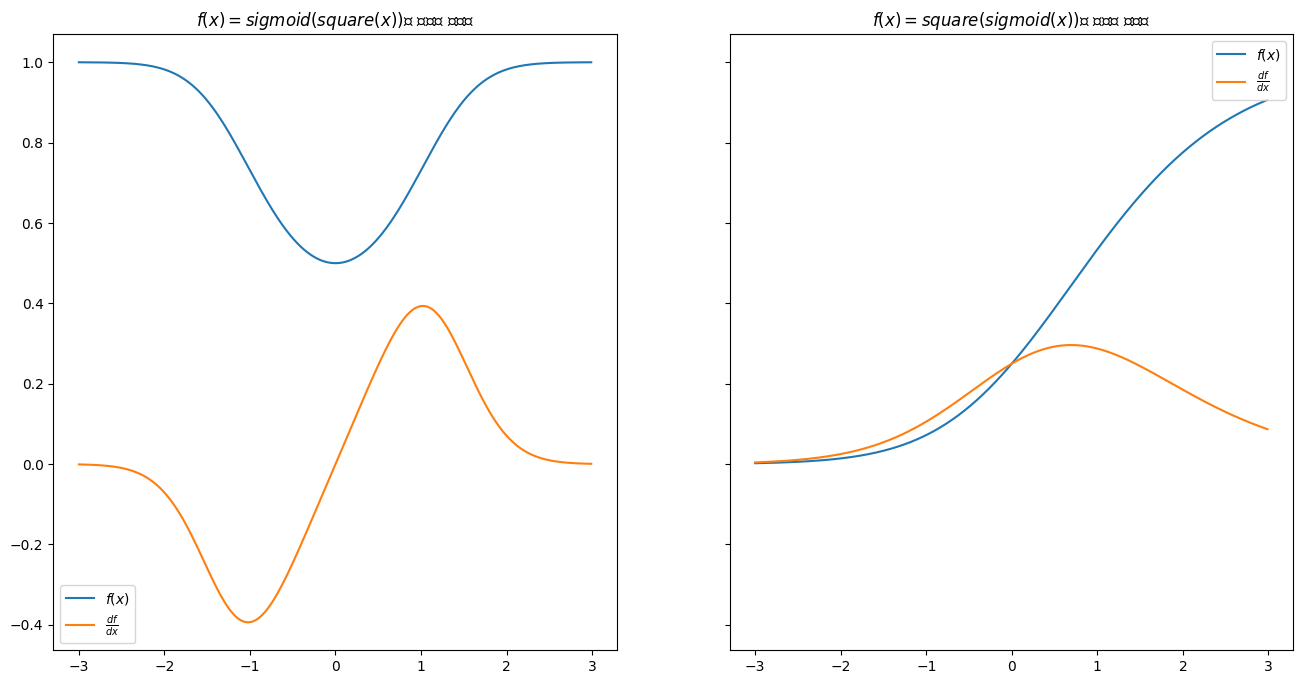

In [75]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("$f(x) = sigmoid(square(x))$의 함수와 도함수")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("$f(x) = square(sigmoid(x))$의 함수와 도함수");

In [76]:
# 복잡한 도함수
def chain_length_3(chain: Chain, x: ndarray) -> ndarray :
  '''
  3개의 함수를 연쇄적으로 평가함.
  '''
  # 인자 chain의 길이는 3
  assert len(chain) == 3

  f1 = chain[0]
  f2 = chain[1]
  f3 = chain[2]

  return f3(f2(f1(x)))

In [77]:
def chain_deriv_3(chain: Chain, input_range: ndarray) -> ndarray :
  '''
  세 함수로 구성된 합성함수의 도함수를 계산하기 위해 연쇄법칙을 사용함.
  (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
  '''

  assert len(chain) == 3

  f1 = chain[0]
  f2 = chain[1]
  f3 = chain[2]

  # f1(x)
  f1_of_x = f1(input_range)

  # f2(f1(x))
  f2_of_x = f2(f1_of_x)

  # df3du
  df3du = deriv(f3, f2_of_x)

  # df2du
  df2du = deriv(f2, f1_of_x)

  # df1dx
  df1dx = deriv(f1, input_range)

  # 곱셈으로 도함수 구함
  return df1dx * df2du * df3du

In [78]:
def plot_chain(ax,
               chain: Chain,
               input_range: ndarray,
               length: int=2) -> None:
    '''
    연쇄법칙을 이용해 합성함수의 도함수를 계산하고 그래프를 작도함.

    ax: 작도에 사용할 matplotlib의 서브플롯
    '''

    assert input_range.ndim == 1, \
    "input_range는 1차원 ndarray여야 함"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

In [79]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> ndarray:
    '''
    연쇄법칙을 이용해 합성함수의 도함수를 계산하고 그래프를 작도함.

    ax: 작도에 사용할 matplotlib의 서브플롯
    '''

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

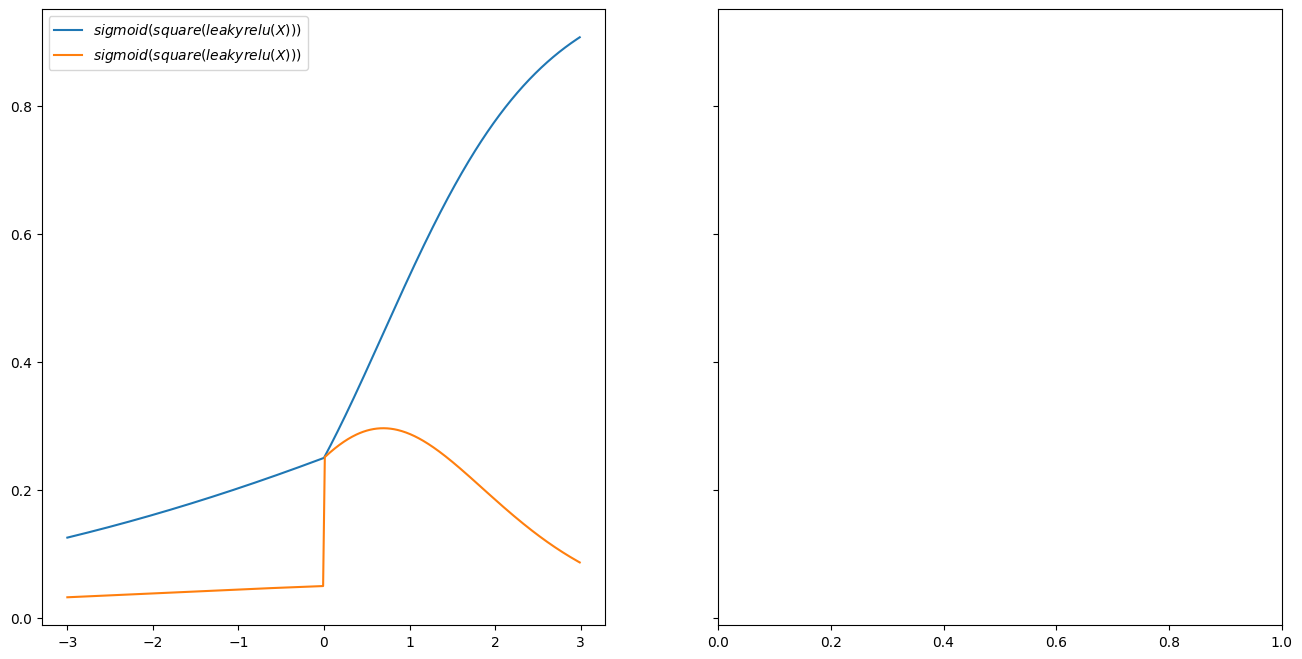

In [80]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,8))

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3,3, 0.01)
plot_chain(ax[0], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_2, PLOT_RANGE, length=3)

ax[0].legend(["$sigmoid(square(leakyrelu(X)))$", "$sigmoid(square(leakyrelu(X)))$"])

plt.show()

### 입력이 두 개 이상인 함수의 합성함수

In [81]:
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float :
    '''
    두 개의 입력을 받아 값을 더하는 함수의 순방향 계산
    '''
    assert x.shape == y.shape

    a = x + y
    return sigma(a)

In [82]:
# 도함수
def multiple_inputs_add_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float :
    '''
    두 개의 입력을 받는 함수의 두 입력에 대한 각각의 도함수 계산
    '''
    # 정방향 계산 수행
    a = x + y

    # 도함수 계산
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady

### 여러 개의 벡터 입력을 갖는 함수

In [83]:
def matmul_forward(X: ndarray, W: ndarray) -> ndarray :
  '''
  순방향 계산을 행렬곱으로 계산
  '''
  assert X.shape[1] == W.shape[0], \
  '''
  행렬곱을 계산하려면 첫 번째 배열의 열의 개수와
  두 번째 배열의 행의 개수가 일치해야 한다.
  그러나 지금은 첫 번째 배열의 열의 개수가 {0}이고
  두 번째 배열의 행의 개수가 {1}이다.
  '''.format(X.shape[1], W.shape[0])

  # 행렬곱 연산
  N = np.dot(X, W)

  return N

In [84]:
# 도함수 구하기
def matmul_backward_first(X: ndarray, W:ndarray) -> ndarray : 
    '''
    첫 번째 인자에 대한 행렬곱의 역방향 계산 수행
    '''
    # 역방향 계산
    dNdX = np.transpose(W, (1,0))

    return dNdX

In [87]:
# X, W값 정의
np.random.seed(190203)

X = np.random.randn(1,3)
W = np.random.randn(3,1)

print(X)

[[ 0.47231121  0.61514271 -1.72622715]]


### 행렬곱과 요소의 합을 포함하는 함수의 도함수

In [88]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function) -> ndarray : 
    '''
    행렬곱이 포함된 함수와 또 다른 함수의 합성함수에 대한 순방향 계산을 수행
    '''
    assert X.shape[1] == W.shape[0]

    # 행렬곱
    N = np.dot(X,W)

    # 행렬곱의 출력을 함수 sigma의 입력값으로 전달
    S = sigma(N)

    return S

In [89]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray : 
    '''
    첫번째 요소에 대한 행렬함수의 도함수 계산
    '''
    assert X.shape[1] == W.shape[0]

    # 행렬곱
    N = np.dot(X, W)

    # 행렬곱의 출력을 함수 sigma의 입력값으로 전달
    S = sigma(N)

    # 역방향 계산
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W, (1,0))

    # 계산한 값을 모두 곱함. 여기서는 dNdX의 모양이 1*1이므로 순서는 무관함
    return np.dot(dSdN, dNdX)

### 도함수 정확성 확인

In [90]:
print(X)

[[ 0.47231121  0.61514271 -1.72622715]]


In [91]:
# 기울기 : -0.1121
print(matrix_function_backward_1(X, W, sigmoid))

[[ 0.08516695 -0.05574581 -0.11206627]]


In [92]:
def forward_test(ind1, ind2, inc) : 
    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc

    return matrix_forward_extra(X1, W, sigmoid)

In [93]:
(np.round(forward_test(0, 2, 0.01) - forward_test(0, 0, 0), 4)) / 0.01

array([[-0.11]])

In [ ]:
np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 2)